## Introduction
Determining the "best" neighborhood is inherently subjective, as different people value different aspects of urban living. However, one often overlooked measure of neighborhood quality is environmental sustainability and accessibility to waste recovery resources. This project explores Pittsburgh neighborhoods through the lens of waste recovery infrastructure, asking: **Which Pittsburgh neighborhood provides the best access to waste recovery and recycling services?**

## Metric
I chose waste recovery locations as my primary metric for several reasons:

1. **Environmental Commitment**: Neighborhoods with more waste recovery options demonstrate a commitment to environmental sustainability
2. **Accessibility**: Easy access to recycling and proper waste disposal indicates resident focused infrastructure
3. **Civic Investment**: These facilities represent public and private investment in neighborhood services
4. **Quality of Life**: Proper waste management correlates with cleaner, more livable neighborhoods

Before settling on waste recovery locations, I considered several alternatives:
- **Number of locations**: Simply counting total facilities
- **Per capita access**: Adjusting for population density (data limitations prevented this)
- **Diversity of services**: Weighing neighborhoods by variety of accepted materials
- **Geographic coverage**: Measuring the area served by facilities

Ultimately, I chose to focus on the raw number of waste recovery locations as the most straightforward and data driven approach, as it directly indicates the accessibility and convenience for residents.


## Data Source
I'm using the **Allegheny County Waste Recovery Locations** dataset from the Western Pennsylvania Regional Data Center (WPRDC). This dataset provides comprehensive information about recycling centers, drop-off locations, and waste recovery facilities throughout Pittsburgh, including:
- Location addresses and neighborhoods
- Types of materials accepted
- Management information (city-managed vs. private)
- Operational details


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
print("Loading data...")
df_waste = pd.read_csv("https://data.wprdc.org/datastore/dump/51f0c4f3-0ddd-4073-8f39-ad19d7528575")

print(f"Total waste recovery locations: {len(df_waste)}")

# Clean neighborhood names (remove nulls and blanks)
df_waste_clean = df_waste[df_waste['neighborhood'].notna()].copy()
df_waste_clean = df_waste_clean[df_waste_clean['neighborhood'] != '']

print(f"Locations with neighborhood data: {len(df_waste_clean)}")

# Count by neighborhood
neighborhood_summary = df_waste_clean.groupby('neighborhood').size().reset_index(name='Total_Locations')
neighborhood_summary = neighborhood_summary.sort_values('Total_Locations', ascending=False)

print("\n📊 TOP 15 NEIGHBORHOODS (Most Waste Recovery Locations):")
best_neighborhoods = neighborhood_summary.head(15)
display(best_neighborhoods)

print("\n⚠️ BOTTOM 15 NEIGHBORHOODS (Fewest Waste Recovery Locations):")
worst_neighborhoods = neighborhood_summary.tail(15).sort_values('Total_Locations', ascending=True)
display(worst_neighborhoods)

# Your winner
winner = neighborhood_summary.iloc[0]
print(f"\n🏆 BEST NEIGHBORHOOD: {winner['neighborhood']}")
print(f"   Total Waste Recovery Locations: {winner['Total_Locations']}")
print(f"   This neighborhood has the most waste recovery options!")

Loading data...
Total waste recovery locations: 49
Locations with neighborhood data: 32

📊 TOP 15 NEIGHBORHOODS (Most Waste Recovery Locations):


,neighborhood,Total_Locations
14,South Side Flats,6
13,Shadyside,4
5,East Liberty,3
12,Point Breeze North,3
16,Strip District,2
3,Chateau,2
1,Central Business District,1
0,Beltzhoover,1
2,Central Northside,1
4,East Allegheny,1



⚠️ BOTTOM 15 NEIGHBORHOODS (Fewest Waste Recovery Locations):


,neighborhood,Total_Locations
1,Central Business District,1
4,East Allegheny,1
2,Central Northside,1
0,Beltzhoover,1
9,Homewood West,1
6,Elliott,1
7,Greenfield,1
8,Hazelwood,1
11,Lower Lawrenceville,1
15,Squirrel Hill South,1



🏆 BEST NEIGHBORHOOD: South Side Flats
   Total Waste Recovery Locations: 6
   This neighborhood has the most waste recovery options!


## Waste Recovery Analysis🗑️📊



1️⃣ BASIC STATISTICS
   Total neighborhoods analyzed: 18
   Average locations per neighborhood: 1.78
   Median locations per neighborhood: 1
   Max locations in one neighborhood: 6
   Min locations in one neighborhood: 1

2️⃣ DISTRIBUTION OF LOCATIONS
   Neighborhoods with only 1 location: 12 (66.7%)
   Neighborhoods with 2+ locations: 6 (33.3%)

3️⃣ MOST COMMONLY ACCEPTED ITEMS
   1. Alkaline Batteries: 32 locations (100.0%)
   2. Automotive Batteries: 32 locations (100.0%)
   3. Cfl Lightbulbs: 32 locations (100.0%)
   4. Clothing: 32 locations (100.0%)
   5. Collectibles: 32 locations (100.0%)
   6. Computers And Peripherals: 32 locations (100.0%)
   7. Construction And Demolition Waste: 32 locations (100.0%)
   8. Fluorescent Tube Lightbulbs: 32 locations (100.0%)
   9. Freon Appliances: 32 locations (100.0%)
   10. Household Chemicals And Waste: 32 locations (100.0%)

4️⃣ MANAGEMENT
   City-managed locations: 32 (100.0%)
   Other locations: 0 (0.0%)

5️⃣ GEOGRAPHIC COVERAGE
   N

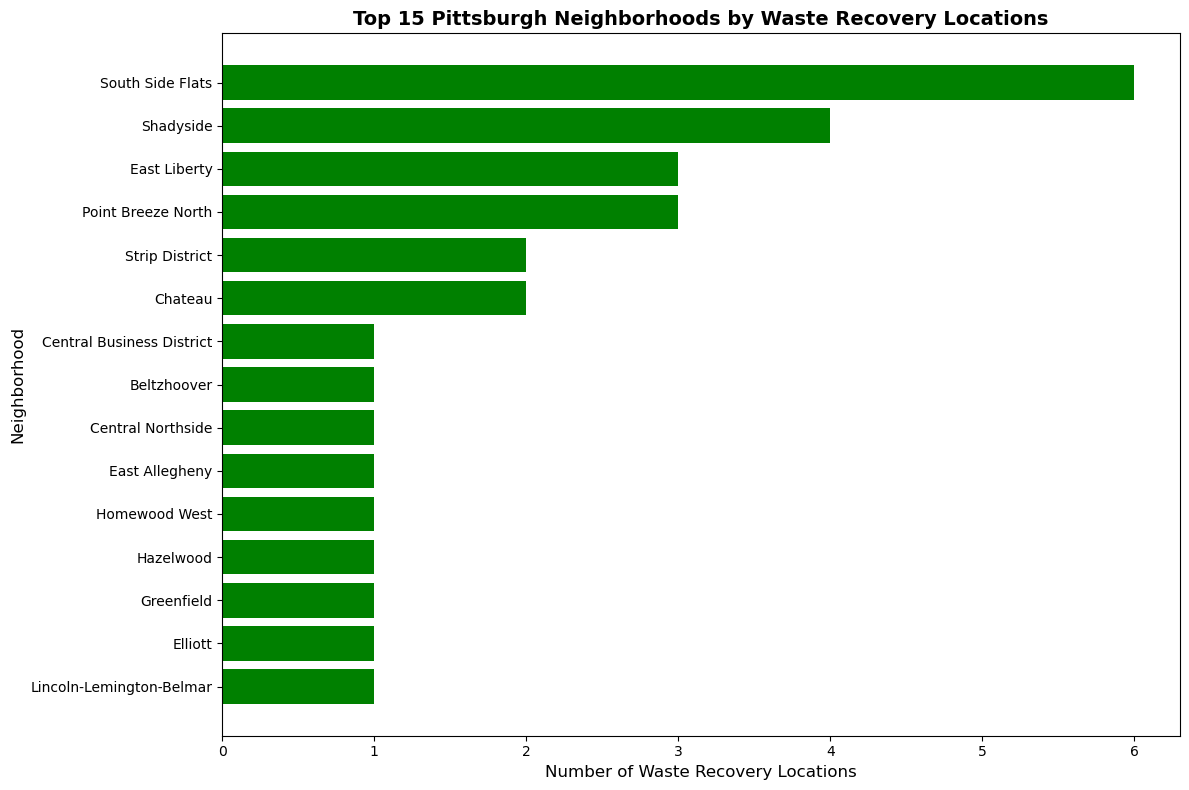

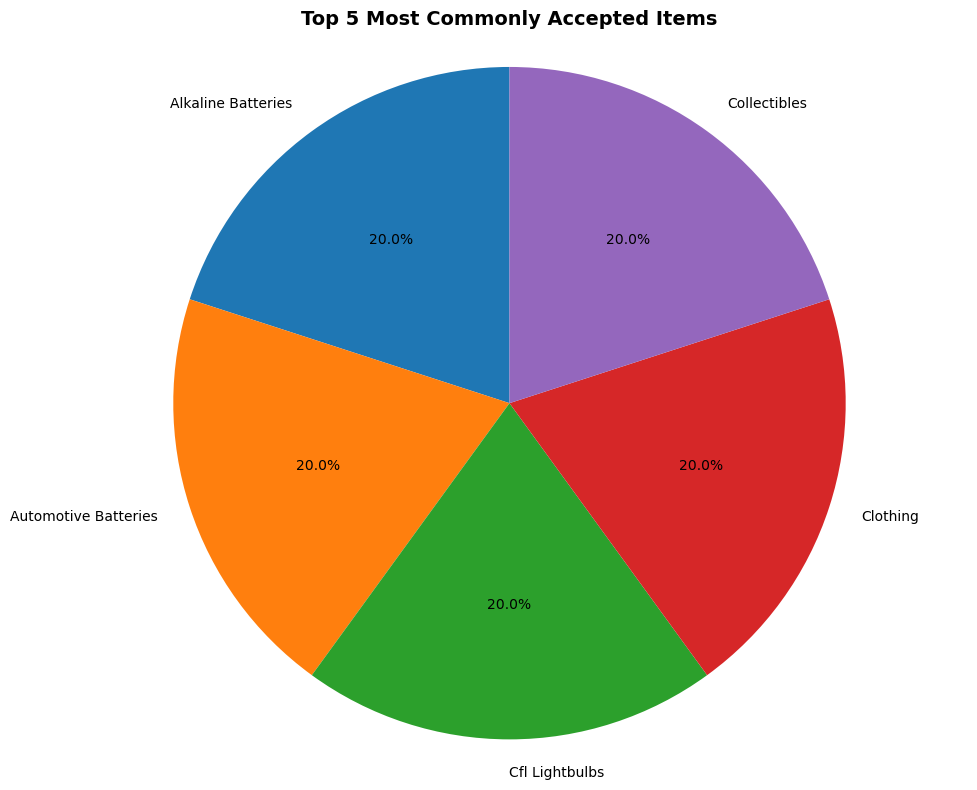


✅ Analysis complete!


In [2]:
print("\n" + "="*60)
print("="*60)

# 1. Basic Statistics
print("\n1️⃣ BASIC STATISTICS")
print(f"   Total neighborhoods analyzed: {len(neighborhood_summary)}")
print(f"   Average locations per neighborhood: {neighborhood_summary['Total_Locations'].mean():.2f}")
print(f"   Median locations per neighborhood: {neighborhood_summary['Total_Locations'].median():.0f}")
print(f"   Max locations in one neighborhood: {neighborhood_summary['Total_Locations'].max()}")
print(f"   Min locations in one neighborhood: {neighborhood_summary['Total_Locations'].min()}")

# 2. Distribution Analysis
print("\n2️⃣ DISTRIBUTION OF LOCATIONS")
single_location = len(neighborhood_summary[neighborhood_summary['Total_Locations'] == 1])
multiple_locations = len(neighborhood_summary[neighborhood_summary['Total_Locations'] > 1])
print(f"   Neighborhoods with only 1 location: {single_location} ({single_location/len(neighborhood_summary)*100:.1f}%)")
print(f"   Neighborhoods with 2+ locations: {multiple_locations} ({multiple_locations/len(neighborhood_summary)*100:.1f}%)")

## 3. What do these locations accept?
print("\n3️⃣ MOST COMMONLY ACCEPTED ITEMS")
acceptance_columns = [col for col in df_waste_clean.columns if col.startswith('accepts_')]
acceptance_counts = {}
for col in acceptance_columns:
    item_name = col.replace('accepts_', '').replace('_', ' ').title()
    # Count True values or 1s (handle both boolean and numeric columns)
    count = df_waste_clean[col].fillna(False).astype(bool).sum()
    acceptance_counts[item_name] = count

# Sort and display top 10
sorted_items = sorted(acceptance_counts.items(), key=lambda x: x[1], reverse=True)
for i, (item, count) in enumerate(sorted_items[:10], 1):
    percentage = (count / len(df_waste_clean)) * 100
    print(f"   {i}. {item}: {count} locations ({percentage:.1f}%)")

# 4. City-managed vs Other
print("\n4️⃣ MANAGEMENT")
# Ensure the column is treated as boolean/numeric
city_managed = df_waste_clean['managed_by_city'].fillna(False).astype(bool).sum()
other_managed = len(df_waste_clean) - city_managed
print(f"   City-managed locations: {city_managed} ({city_managed/len(df_waste_clean)*100:.1f}%)")
print(f"   Other locations: {other_managed} ({other_managed/len(df_waste_clean)*100:.1f}%)")

# 5. Geographic Coverage
print("\n5️⃣ GEOGRAPHIC COVERAGE")
total_neighborhoods_in_pgh = 90  # Pittsburgh has ~90 neighborhoods
coverage = (len(neighborhood_summary) / total_neighborhoods_in_pgh) * 100
print(f"   Neighborhoods with at least 1 location: {len(neighborhood_summary)} out of ~{total_neighborhoods_in_pgh}")
print(f"   Coverage: {coverage:.1f}%")
print(f"   Neighborhoods without coverage: ~{total_neighborhoods_in_pgh - len(neighborhood_summary)}")

# 6. Visualizations
print("\n6️⃣ CREATING VISUALIZATIONS...")

# Bar chart of top 15 neighborhoods
plt.figure(figsize=(12, 8))
plt.barh(best_neighborhoods['neighborhood'], best_neighborhoods['Total_Locations'], color='green')
plt.xlabel('Number of Waste Recovery Locations', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.title('Top 15 Pittsburgh Neighborhoods by Waste Recovery Locations', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Pie chart of accepted items (top 5)
plt.figure(figsize=(10, 8))
top_5_items = sorted_items[:5]
labels = [item[0] for item in top_5_items]
sizes = [item[1] for item in top_5_items]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Most Commonly Accepted Items', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\n✅ Analysis complete!")

## Best Neighborhood🥇🌆

After cleaning and grouping the dataset by neighborhood, I ranked each area based on the total number of waste recovery and recycling locations. This metriccaptures which neighborhoods provide the most accessible opportunities for residents to recycle, dispose of materials properly, and engage in environmentally responsible behavior.

According to the Allegheny County Waste Recovery Locations dataset, South Side Flats ranks as the best neighborhood for waste recovery access. With 6 total facilities, it has more waste recovery locations than any other neighborhood in Pittsburgh 


The next closest neighborhoods, Shadyside (4) and East Liberty and Point Breeze North (3 each), fall notably behind.

To visualize this distribution, I created a bar chart displaying the top fifteen neighborhoods by total facilities. The visualization shows a steep drop off after South Side Flats, highlighting how disproportionately resource rich it is compared to the rest of the city. This suggests not only strong environmental infrastructure, but also significant civic investment and accessibility for residents who rely on local options for recycling and responsible waste disposal.

Based purely on the data and the chosen metric, South Side Flats provides the most comprehensive access to waste recovery and recycling services in Pittsburgh, making it the top ranked neighborhood in this analysis.

## Conclusion

Using a data driven approach allowed me to evaluate Pittsburgh neighborhoods in a structured and objective way. Based on my metric—the number of waste recovery locations, South Side Flats emerges as the best neighborhood for accessing recycling and waste recovery services. This conclusion is grounded entirely in the dataset, even though my personal favorite neighborhood is the Hill District for reasons unrelated to this metric.

This project also shows how different definitions of “best” can coexist: one informed by quantifiable environmental infrastructure, and another shaped by personal experience, culture, and connection. While the data identifies South Side Flats as the top neighborhood for waste recovery access, personal preferences may prioritize qualities that data alone cannot capture.